In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

2025-05-16 19:37:09.155809: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-16 19:37:09.237513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747417029.277994  678272 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747417029.290684  678272 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747417029.349891  678272 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
export_dir = "./exports"
test_dataset = pd.read_parquet(export_dir + "/test_dataset.pq")

In [3]:
test_dataset

,user_id,video_id,watch_ratio,avg_feat_0,avg_feat_1,avg_feat_2,avg_feat_3,avg_feat_4,avg_feat_5,avg_feat_6,...,category_30,category_31,category_32,category_33,category_34,category_35,category_36,category_37,category_38,category_39
0,14,148,0.722103,4.893488,-0.005523,1.736791,-1.155868,0.614185,0.600311,0.179844,...,0,0,0,0,0,0,0,0,0,0
1,14,183,1.907377,4.893488,-0.005523,1.736791,-1.155868,0.614185,0.600311,0.179844,...,0,0,0,0,0,0,0,0,0,0
2,14,3649,2.063311,4.893488,-0.005523,1.736791,-1.155868,0.614185,0.600311,0.179844,...,0,0,0,0,0,0,0,0,0,0
3,14,5262,0.566388,4.893488,-0.005523,1.736791,-1.155868,0.614185,0.600311,0.179844,...,0,0,0,0,0,0,0,0,0,0
4,14,8234,0.418364,4.893488,-0.005523,1.736791,-1.155868,0.614185,0.600311,0.179844,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837173,7162,9177,0.142857,-1.015952,0.964028,-0.313854,0.041464,-0.154040,0.852099,0.386686,...,0,0,0,0,0,0,0,0,0,0
3837174,7162,4987,1.234848,-1.015952,0.964028,-0.313854,0.041464,-0.154040,0.852099,0.386686,...,0,0,0,0,0,0,0,0,0,0
3837175,7162,7988,1.024412,-1.015952,0.964028,-0.313854,0.041464,-0.154040,0.852099,0.386686,...,0,0,0,0,0,0,0,0,0,0
3837176,7162,6533,0.273750,-1.015952,0.964028,-0.313854,0.041464,-0.154040,0.852099,0.386686,...,0,0,0,0,0,0,0,0,0,0


In [4]:
user_columns = [f"avg_feat_{i}" for i in range(31)] + [f"avg_category_{i}" for i in range(1, 40)]
video_columns = ["video_duration", "trend_score"] + [f"feat_{i}" for i in range(31)] + [f"category_{i}" for i in range(1, 40)]
label_column = ["watch_ratio"]

X_user_test = test_dataset[user_columns].to_numpy()
X_video_test = test_dataset[video_columns].to_numpy()
y_test = test_dataset[label_column].values

In [5]:
X_video_test

array([[-0.79118819,  0.31023009,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.78322006,  0.1422213 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33372393,  0.27602862,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 9.33302086,  0.51752451,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33794235,  0.5623194 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.51769393,  0.4846652 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], shape=(3837178, 72))

In [6]:
dataset = tf.data.Dataset.from_tensor_slices(((X_user_test, X_video_test),))
BATCH_SIZE = 2048
dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
model = tf.keras.models.load_model(export_dir + "/model.keras")
y_preds = model.predict(dataset, verbose=False)

I0000 00:00:1747417033.864695  678272 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13471 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
import numpy as np

mae = np.mean(np.abs(y_preds.flatten() - y_test.flatten()))
print("MAE:", mae)

MAE: 0.3102000298375824


In [8]:
sample_df = pd.DataFrame({"actual": y_test.flatten(), "predicted": y_preds.flatten()}).sample(10, random_state=42)
print(sample_df)

           actual  predicted
249743   0.691293   0.590746
2761177  0.720158   0.484915
2348130  0.416126   0.341640
1557971  0.976388   1.453118
2122438  0.509848   0.681111
2497604  1.041318   0.942548
2989414  0.973204   0.786268
1118757  0.575790   0.693272
2909442  0.385412   0.876506
3676753  0.799825   0.841791


In [9]:
def precision_at_k(y_true, y_pred, k):
    y_true_k = y_true[:k]
    y_pred_k = y_pred[:k]
    return len(set(y_true_k) & set(y_pred_k)) / k

def recall_at_k(y_true, y_pred, k):
    y_pred_k = y_pred[:k]
    return len(set(y_true) & set(y_pred_k)) / len(y_true) if y_true is not None else 0

In [10]:
def to_dataset(df: pd.DataFrame) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    user_columns = [f"avg_feat_{i}" for i in range(31)] + [f"avg_category_{i}" for i in range(1, 40)]
    video_columns = ["video_duration", "trend_score"] + [f"feat_{i}" for i in range(31)] + [f"category_{i}" for i in range(1, 40)]
    target = "watch_ratio"
    X_user, X_video, y = df[user_columns].values, df[video_columns], df[target].values
    return X_user, X_video, y, df["video_id"].values

In [11]:
test_dataset

,user_id,video_id,watch_ratio,avg_feat_0,avg_feat_1,avg_feat_2,avg_feat_3,avg_feat_4,avg_feat_5,avg_feat_6,...,category_30,category_31,category_32,category_33,category_34,category_35,category_36,category_37,category_38,category_39
0,14,148,0.722103,4.893488,-0.005523,1.736791,-1.155868,0.614185,0.600311,0.179844,...,0,0,0,0,0,0,0,0,0,0
1,14,183,1.907377,4.893488,-0.005523,1.736791,-1.155868,0.614185,0.600311,0.179844,...,0,0,0,0,0,0,0,0,0,0
2,14,3649,2.063311,4.893488,-0.005523,1.736791,-1.155868,0.614185,0.600311,0.179844,...,0,0,0,0,0,0,0,0,0,0
3,14,5262,0.566388,4.893488,-0.005523,1.736791,-1.155868,0.614185,0.600311,0.179844,...,0,0,0,0,0,0,0,0,0,0
4,14,8234,0.418364,4.893488,-0.005523,1.736791,-1.155868,0.614185,0.600311,0.179844,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837173,7162,9177,0.142857,-1.015952,0.964028,-0.313854,0.041464,-0.154040,0.852099,0.386686,...,0,0,0,0,0,0,0,0,0,0
3837174,7162,4987,1.234848,-1.015952,0.964028,-0.313854,0.041464,-0.154040,0.852099,0.386686,...,0,0,0,0,0,0,0,0,0,0
3837175,7162,7988,1.024412,-1.015952,0.964028,-0.313854,0.041464,-0.154040,0.852099,0.386686,...,0,0,0,0,0,0,0,0,0,0
3837176,7162,6533,0.273750,-1.015952,0.964028,-0.313854,0.041464,-0.154040,0.852099,0.386686,...,0,0,0,0,0,0,0,0,0,0


In [12]:
user = 1534
X_user, X_video, y_test, video_ids = to_dataset(test_dataset[test_dataset["user_id"] == user])
y_preds = model.predict(((X_user, X_video),), verbose=False).flatten()
indexes = np.flip(np.argsort(y_test))
ground_truth = video_ids[indexes]
indexes = np.flip(np.argsort(y_preds))
recommendations = video_ids[indexes]

/home/sah/miniforge3/envs/recommender/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['user_input', 'video_input']
Received: inputs=(('Tensor(shape=(32, 70))', 'Tensor(shape=(32, 72))'),)
  warnings.warn(msg)
/home/sah/miniforge3/envs/recommender/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['user_input', 'video_input']
Received: inputs=(('Tensor(shape=(None, 70))', 'Tensor(shape=(None, 72))'),)
  warnings.warn(msg)


In [13]:
from sklearn.metrics import ndcg_score
ndcg_5 = ndcg_score([y_test], [y_preds], k=5)
ndcg_10 = ndcg_score([y_test], [y_preds], k=10)
ndcg_50 = ndcg_score([y_test], [y_preds], k=50)

print(f"NDCG@5: {ndcg_5:.4f}")
print(f"NDCG@10: {ndcg_10:.4f}")
print(f"NDCG@50: {ndcg_50:.4f}")

NDCG@5: 0.7307
NDCG@10: 0.7578
NDCG@50: 0.8412


In [14]:
from tqdm import tqdm

user_columns = [f"avg_feat_{i}" for i in range(31)] + [f"avg_category_{i}" for i in range(1, 40)]
video_columns = ["video_duration", "trend_score"] + [f"feat_{i}" for i in range(31)] + [f"category_{i}" for i in range(1, 40)]

ndcg_10_list = []

for user_id, group in tqdm(test_dataset.groupby("user_id", sort=False)):
    if len(group) < 10:
        continue

    X_user = group[user_columns].to_numpy()
    X_video = group[video_columns].to_numpy()
    y_test = group["watch_ratio"].to_numpy()

    y_pred = model.predict((X_user, X_video), batch_size=512, verbose=False).flatten()
    ndcg = ndcg_score([y_test], [y_pred], k=10)
    ndcg_10_list.append(ndcg)

100%|██████████| 1354/1354 [00:57<00:00, 23.43it/s]


In [15]:
print(f"Mean ndcg@10 over all of the small_matrix users: {np.mean(ndcg_10_list)}")
print(f"Median ndcg@10 over all of the small_matrix users: {np.median(ndcg_10_list)}")
print(f"Max ndcg@10 over all of the small_matrix users: {np.max(ndcg_10_list)}")
print(f"Min ndcg@10 over all of the small_matrix users: {np.min(ndcg_10_list)}")

Mean ndcg@10 over all of the small_matrix users: 0.5993099708428323
Median ndcg@10 over all of the small_matrix users: 0.6002235387739219
Max ndcg@10 over all of the small_matrix users: 0.9911257134576742
Min ndcg@10 over all of the small_matrix users: 0.15616749106569505


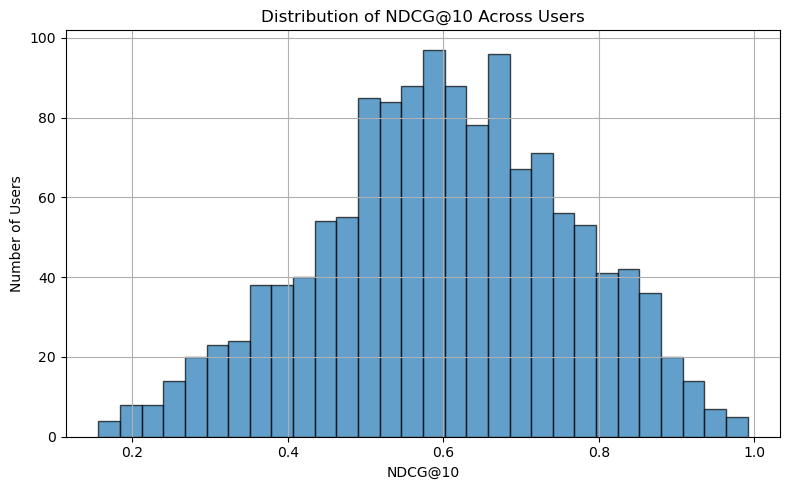

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(ndcg_10_list, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of NDCG@10 Across Users')
plt.xlabel('NDCG@10')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()

# BASELINE

In [17]:
baseline_predictions = np.full_like(y_test, np.mean(y_test), dtype=np.float32)
baseline_test_mae = np.mean(np.abs(baseline_predictions - y_test))
print(f"Baseline MAE: {baseline_test_mae:.4f}")

Baseline MAE: 0.6362


In [18]:
def get_user_recommendation_data_baseline(user: int):
    test_dataset["mean_watch_ratio"] = test_dataset.groupby("video_id")["watch_ratio"].mean()
    preds = np.array(test_dataset[test_dataset["user_id"] == user]["mean_watch_ratio"].to_list())
    user_mat = test_dataset[test_dataset["user_id"] == user].reset_index(drop=True)
    to_recommend_index = np.flip(preds.argsort())
    to_recommend = user_mat["video_id"][to_recommend_index].values

    ground_truth_index = np.flip(user_mat["watch_ratio"].values.argsort())
    ground_truth = user_mat["video_id"][ground_truth_index].values

    return to_recommend, ground_truth

baseline_recos, ground_truth = get_user_recommendation_data_baseline(1534)

In [19]:
ndcg_5 = ndcg_score([ground_truth], [baseline_recos], k=5)
ndcg_10 = ndcg_score([ground_truth], [baseline_recos], k=10)
ndcg_50 = ndcg_score([ground_truth], [baseline_recos], k=50)

print(f"NDCG@5: {ndcg_5:.4f}")
print(f"NDCG@10: {ndcg_10:.4f}")
print(f"NDCG@50: {ndcg_50:.4f}")

NDCG@5: 0.3341
NDCG@10: 0.3937
NDCG@50: 0.4547


In [20]:
from tqdm import tqdm
ndcg_10_baseline_list = []
for user_id, group in tqdm(test_dataset.groupby("user_id", sort=False)):
    if len(group) < 10:
        continue

    y_pred, y_truth = get_user_recommendation_data_baseline(user_id)
    ndcg = ndcg_score([y_truth], [y_pred], k=10)
    ndcg_10_baseline_list.append(ndcg)
print(np.mean(ndcg_10_baseline_list))

100%|██████████| 1354/1354 [01:53<00:00, 11.92it/s]

0.47329122434888127
